In [1]:
import matplotlib.pyplot as plt

"""
Small demo to illustrate how the plot function and the gridworld environment work
"""
import numpy as np
import optuna
from gridworld import *
from plot import *
import optimize
import algorithms

COUNT_ENVIRONMENT = 10

c:\Users\schmidtfa\MasterStudium\PythonEnvironment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SARSA_PARAMS_A1 = optimize.load_study('DRL_Studienarbeit1_A1_sarsa','sqlite:///DRL_Studienarbeit1_A1_sarsa.db')
SARSA_PARAMS_A2 = optimize.load_study('DRL_Studienarbeit1_A2_sarsa','sqlite:///DRL_Studienarbeit1_A2_sarsa.db')

Q_PARAMS_A1 = optimize.load_study('DRL_Studienarbeit1_A1','sqlite:///DRL_Studienarbeit1_A1.db')
Q_PARAMS_A2 = optimize.load_study('test','sqlite:///DRL_Studienarbeit1_A2.db')

In [ ]:
study = optimize.optimize(env)
study.run_study("test", "sqlite:///test.db", "maximize")

# Plot 1: Cumulative reward of the current episode over episodes

In [3]:
qlearning_data={}
sarsa_data={}
envs_A1 = []

for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0.3, mountain=0)
    envs_A1.append(env)        

    print(f"running environment: {i}")
    qlearning_data[i] = algorithms.qlearning(env,
                                  Q_PARAMS_A1['ALPHA'],
                                  Q_PARAMS_A1['GAMMA'],
                                  Q_PARAMS_A1['EPISODES'],
                                  Q_PARAMS_A1['MAX_EPISODE_LENGTH'],
                                  Q_PARAMS_A1['INIT_REWARD'],
                                  Q_PARAMS_A1['EPS'],
                                  Q_PARAMS_A1['DECAY'])
    
    sarsa_data[i] = algorithms.sarsa(env,
                          SARSA_PARAMS_A1['ALPHA'],
                          SARSA_PARAMS_A1['GAMMA'],
                          SARSA_PARAMS_A1['EPISODES'],
                          SARSA_PARAMS_A1['MAX_EPISODE_LENGTH'],
                          SARSA_PARAMS_A1['INIT_REWARD'],
                          SARSA_PARAMS_A1['EPS'],
                          SARSA_PARAMS_A1['DECAY'])
    

running environment: 0
running environment: 1
running environment: 2
running environment: 3
running environment: 4
running environment: 5
running environment: 6
running environment: 7
running environment: 8
running environment: 9


In [ ]:
for row in envs_A1[8].grid:
    print(row)

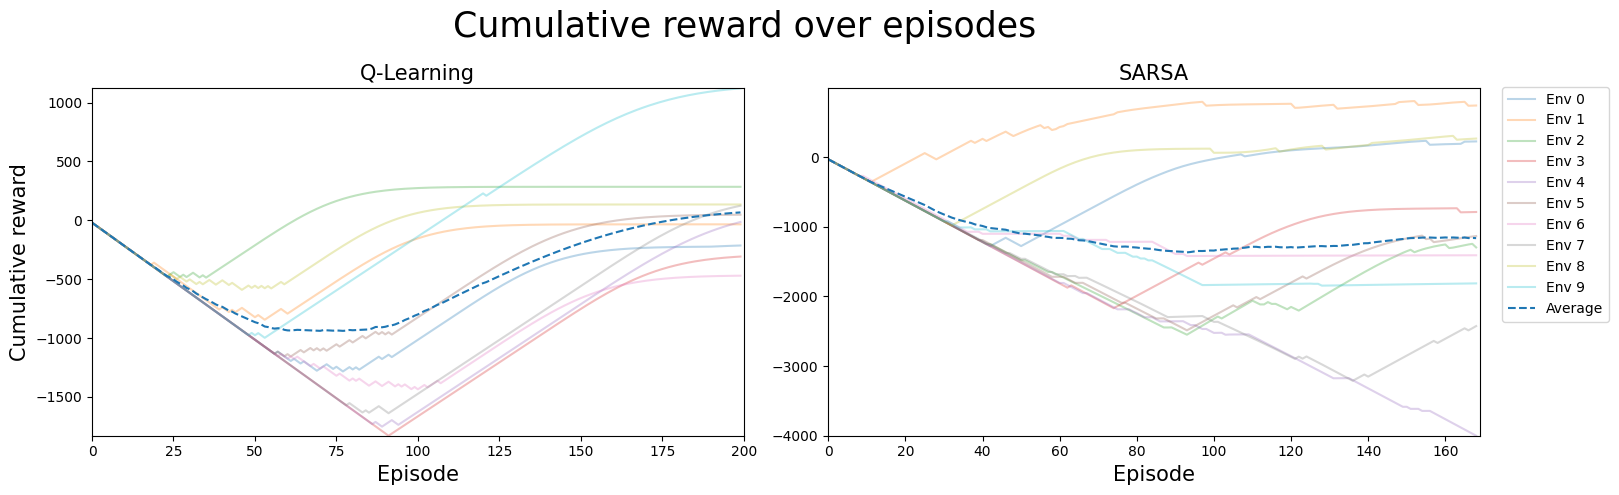

In [4]:
plot_episodes(qlearning_data, Q_PARAMS_A1['EPISODES'], sarsa_data, SARSA_PARAMS_A1['EPISODES'])

# Plot 2: Cumulative reward over amount of steps

In [5]:
qlearning_data_A2={}
sarsa_data_A2={}
envs2 = []

for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0, mountain=0.3)
    envs2.append(env)
    print(f"running env: {i}")
    qlearning_data_A2[i] = algorithms.qlearning(env,
                            Q_PARAMS_A2['ALPHA'],
                            Q_PARAMS_A2['GAMMA'],
                            Q_PARAMS_A2['EPISODES'],
                            Q_PARAMS_A2['MAX_EPISODE_LENGTH'],
                            Q_PARAMS_A2['INIT_VALUE'],
                            Q_PARAMS_A2['EPS'],
                            Q_PARAMS_A2['DECAY'])
    
    sarsa_data_A2[i] = algorithms.sarsa(env,
                            SARSA_PARAMS_A2['ALPHA'],
                            SARSA_PARAMS_A2['GAMMA'],
                            SARSA_PARAMS_A2['EPISODES'],
                            SARSA_PARAMS_A2['MAX_EPISODE_LENGTH'],
                            SARSA_PARAMS_A2['INIT_REWARD'],
                            SARSA_PARAMS_A2['EPS'],
                            SARSA_PARAMS_A2['DECAY'])

running env: 0
running env: 1
running env: 2
running env: 3
running env: 4
running env: 5
running env: 6
running env: 7
running env: 8
running env: 9


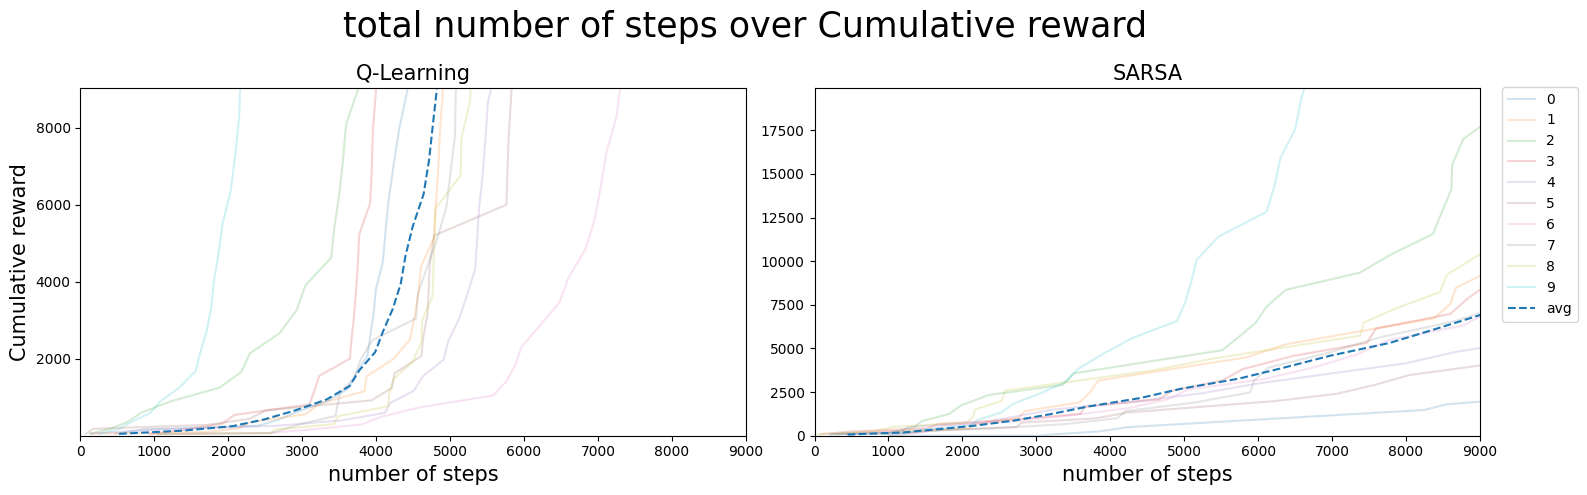

In [6]:
plot_steps(qlearning_data_A2,Q_PARAMS_A2['EPISODES'],sarsa_data_A2, SARSA_PARAMS_A2['EPISODES'])